<a href="https://colab.research.google.com/github/mehreengillani/Data602/blob/main/NYC_Motor_Vehicle_Collisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity: NYC Motor Vehicle Collisions - City Safety Analyst Report

**Overview**

In this one-hour live meetup, you’ll work in small groups (2-3 students) as City Safety Analysts for the NYC Department of Transportation. Your team has been assigned a borough to analyze data from the NYC Motor Vehicle Collisions Dataset, which tracks vehicle crashes across the city. Your task is to investigate crash patterns, identify safety risks, and propose data-driven recommendations to reduce accidents. Each group will present a concise "Safety Report" to the "DOT leadership" (the class), simulating a workplace briefing.

---



**Dataset Description**

https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data

Check out this link for info on columns


---



# Workplace Scenario: City Safety Analysts

**Role**: You’re a team of analysts tasked with improving road safety in your assigned borough.

**Objective**: Use data to pinpoint a key safety issue and recommend a actionable solution (e.g., "Install speed bumps on high-speed crash zones").

**Presentation**: Deliver a concise "Safety Report" as if briefing DOT leadership, including:

* A key finding (e.g., "40% of crashes are due to driver distraction").
* A visualization (e.g., bar chart).
* A recommendation (e.g., "Increase distracted driving awareness campaigns").



---



**Analysis** (35 minutes): Groups analyze their borough’s data, focusing on:

* Common causes of crashes.
* Patterns in time or severity.
* High-risk factors or areas.

**Prepare Presentation** (10 minutes): Create a "Safety Report" with a visualization and a practical recommendation (e.g., new traffic signal, speed cameras).

**Present** (15 minutes): Each group presents their report (2-3 minutes) as if briefing DOT leadership, followed by a quick class discussion.


---




# Guided Open-Ended Questions

**Each group should answer 1-2 of these questions for their borough:**

What are the most common causes of crashes in your borough?

* Example: Bar chart of top contributing factors.

* Follow-Up: Are any causes unexpectedly frequent?

* Do any causes suprise you? What real-world situations might explain these patterns?

* tips: pandas value_count() function, seaborn barplot

https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
https://seaborn.pydata.org/generated/seaborn.barplot.html



When do crashes happen most often in your borough?
* Example: Line plot or histogram of crashes by hour or month.
* Follow-Up: Are there peak times tied to specific factors (e.g., rush hour distractions)?
* What hours show spikes? Are they morning/evening rush hours?  Could lighting, weather, commuting patterns explain this trend?
* tips: datetime in pandas, seaborn lineplot
https://pandas.pydata.org/docs/user_guide/timeseries.html
https://seaborn.pydata.org/generated/seaborn.lineplot.html


How severe are crashes in your borough?

* Example: Bar chart of crashes by injury/fatality count.
* Follow-Up: Which factors lead to the most severe outcomes?
* tips: pandas groupby(), seaborn barplot
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
https://seaborn.pydata.org/generated/seaborn.barplot.html


Which crashes could have been prevented with better infrastructure?
* Example: Filter for factors like "Unsafe Speed" or "Traffic Control Disregarded" and visualize.
* Follow-Up: Are there patterns suggesting specific fixes (e.g., more stop signs)?
* tips: filtering with pandas, example contributing factors: unsafe speed. failure to yield
https://pandas.pydata.org/docs/user_guide/indexing.html


Open-Ended Exploration: What unique safety challenge does your borough face?
* Example: Compare injury rates to crash frequency or identify the deadliest crash type.

More Ideas: Crashes by vehicle type, seasonal trends, crashes by vehicle type, comparing boroughs

**Tips for Success**

* Collaboration: Divide roles (e.g., one person analyzes causes, another plots time trends, another drafts the recommendation).
* Practicality: Focus on actionable insights, as in a real job.
* Presentation: Keep it concise, like a professional briefing.

**Example Safety Report**

* “We’re the Queens Safety Analysts. Our data shows unsafe speed is the top crash cause.”
* (Show bar chart of top factors.)
* “We recommend speed cameras on major arterials to reduce incidents.”

In [82]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch data from NYC Open Data API (10,000 rows, all boroughs)
url = "https://data.cityofnewyork.us/resource/h9gi-nx95.json?$limit=10000"
response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert key columns
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')
df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M', errors='coerce').dt.hour
df['number_of_persons_injured'] = pd.to_numeric(df['number_of_persons_injured'], errors='coerce')
df['number_of_persons_killed'] = pd.to_numeric(df['number_of_persons_killed'], errors='coerce')

# Inspect columns and first few rows
print("Available columns:", df.columns.tolist())

# Assign your borough (change to your group's assigned borough)
your_borough = 'Brooklyn'  # Example: Change to 'Bronx', 'Brooklyn', etc.
borough_df = df[df['borough'] == your_borough.upper()]  # API returns boroughs in uppercase

Available columns: ['crash_date', 'crash_time', 'on_street_name', 'off_street_name', 'number_of_persons_injured', 'number_of_persons_killed', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed', 'number_of_cyclist_injured', 'number_of_cyclist_killed', 'number_of_motorist_injured', 'number_of_motorist_killed', 'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2', 'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough', 'zip_code', 'latitude', 'longitude', 'location', 'contributing_factor_vehicle_3', 'vehicle_type_code_3', 'cross_street_name', 'contributing_factor_vehicle_4', 'vehicle_type_code_4', 'contributing_factor_vehicle_5', 'vehicle_type_code_5']


In [83]:
print("\nFirst 5 rows:")
borough_df.head()


First 5 rows:


,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,latitude,longitude,location,contributing_factor_vehicle_3,vehicle_type_code_3,cross_street_name,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
2,2023-11-01,1,OCEAN PARKWAY,AVENUE K,1,0,0,0,0,0,...,40.62179,-73.970024,"{'latitude': '40.62179', 'longitude': '-73.970...",Unspecified,Sedan,NaN,NaN,NaN,NaN,NaN
9,2021-09-11,9,NaN,NaN,0,0,0,0,0,0,...,40.667202,-73.8665,"{'latitude': '40.667202', 'longitude': '-73.86...",NaN,NaN,1211 LORING AVENUE,NaN,NaN,NaN,NaN
10,2021-12-14,8,SARATOGA AVENUE,DECATUR STREET,0,0,0,0,0,0,...,40.683304,-73.917274,"{'latitude': '40.683304', 'longitude': '-73.91...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2021-12-14,21,NaN,NaN,0,0,0,0,0,0,...,40.67172,-73.8971,"{'latitude': '40.67172', 'longitude': '-73.897...",NaN,NaN,2047 PITKIN AVENUE,NaN,NaN,NaN,NaN
21,2021-12-14,17,NaN,NaN,0,0,0,0,0,0,...,40.68158,-73.97463,"{'latitude': '40.68158', 'longitude': '-73.974...",NaN,NaN,480 DEAN STREET,NaN,NaN,NaN,NaN


In [42]:
#create a copy first
borough_df = borough_df.copy()

# Now safely modify the copy
borough_df['number_of_pedestrians_injured'] = pd.to_numeric(
    borough_df['number_of_pedestrians_injured'], errors='coerce'
).astype('Int64')

borough_df['number_of_pedestrians_killed'] = pd.to_numeric(
    borough_df['number_of_pedestrians_killed'], errors='coerce'
).astype('Int64')
borough_df['number_of_cyclist_killed'] = pd.to_numeric(
    borough_df['number_of_cyclist_killed'], errors='coerce'
).astype('Int64')

borough_df['number_of_cyclist_injured'] = pd.to_numeric(
    borough_df['number_of_cyclist_injured'], errors='coerce'
).astype('Int64')

borough_df['number_of_motorist_injured'] = pd.to_numeric(
    borough_df['number_of_motorist_injured'], errors='coerce'
).astype('Int64')
borough_df['number_of_motorist_killed'] = pd.to_numeric(
    borough_df['number_of_motorist_killed'], errors='coerce'
).astype('Int64')

In [69]:
#lets describe our dataframe
borough_df.describe()

,crash_date,crash_time,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,hour
count,2341,0,2341.000000,2341.000000,2341.0,2341.0,2341.0,2341.0,2341.0,2341.0,0.0
mean,2021-08-14 08:03:29.141392384,NaT,0.474156,0.002563,0.074327,0.002136,0.05724,0.05724,0.0,0.0,NaN
min,2016-04-16 00:00:00,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
25%,2021-04-21 00:00:00,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
50%,2021-07-07 00:00:00,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
75%,2021-09-18 00:00:00,NaT,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
max,2023-12-15 00:00:00,NaT,7.000000,1.000000,2.0,1.0,2.0,2.0,0.0,0.0,NaN
std,NaN,NaN,0.784379,0.050572,0.273523,0.046176,0.234183,0.234183,0.0,0.0,NaN


In [48]:
#lets print the unique values for contributing_factor_vehicle_1
value_counts = borough_df['contributing_factor_vehicle_1'].value_counts()
print(value_counts)

contributing_factor_vehicle_1
Unspecified                                              760
Driver Inattention/Distraction                           564
Failure to Yield Right-of-Way                            158
Following Too Closely                                     96
Passing or Lane Usage Improper                            96
Passing Too Closely                                       91
Traffic Control Disregarded                               74
Backing Unsafely                                          72
Other Vehicular                                           64
Unsafe Speed                                              52
Turning Improperly                                        45
Alcohol Involvement                                       41
Driver Inexperience                                       40
Reaction to Uninvolved Vehicle                            22
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     20
View Obstructed/Limited                                

In [49]:
#lets print the unique values for contributing_factor_vehicle_2
value_counts = borough_df['contributing_factor_vehicle_2'].value_counts()
print(value_counts)

contributing_factor_vehicle_2
Unspecified                                              1616
Driver Inattention/Distraction                             78
Other Vehicular                                            25
Traffic Control Disregarded                                17
Passing or Lane Usage Improper                             11
Failure to Yield Right-of-Way                              10
Passing Too Closely                                         9
View Obstructed/Limited                                     9
Following Too Closely                                       5
Unsafe Lane Changing                                        5
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion       4
Driver Inexperience                                         4
Reaction to Uninvolved Vehicle                              3
Unsafe Speed                                                3
Turning Improperly                                          3
Oversized Vehicle                       

In [96]:
#lets print the unique values for contributing_factor_vehicle_3
value_counts = borough_df['contributing_factor_vehicle_3'].value_counts()
print(value_counts)

contributing_factor_vehicle_3
Unspecified        259
Other Vehicular      2
Name: count, dtype: int64


In [97]:
#lets print the unique values for contributing_factor_vehicle_4
value_counts = borough_df['contributing_factor_vehicle_4'].value_counts()
print(value_counts)

contributing_factor_vehicle_4
Unspecified        82
Other Vehicular     1
Name: count, dtype: int64


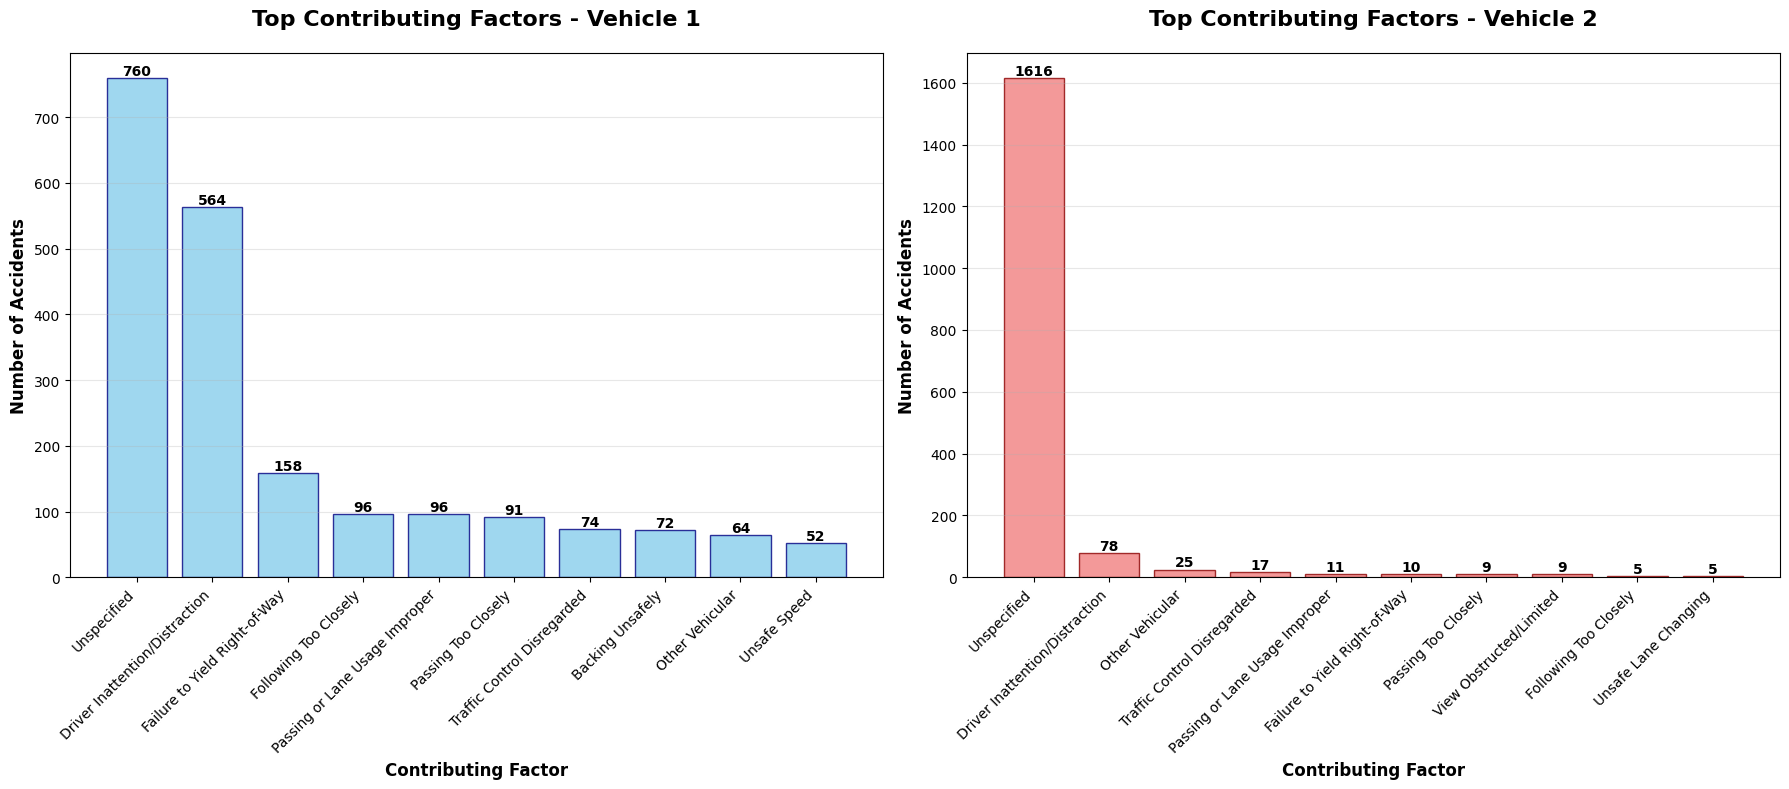

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set style for better visuals
plt.style.use('default')

# Get top N factors for both columns
top_n = 10
top_factors_1 = borough_df['contributing_factor_vehicle_1'].value_counts().head(top_n)
top_factors_2 = borough_df['contributing_factor_vehicle_2'].value_counts().head(top_n)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Vehicle 1 bar chart
bars1 = ax1.bar(range(len(top_factors_1)), top_factors_1.values,
                color='skyblue', edgecolor='navy', alpha=0.8)
ax1.set_title('Top Contributing Factors - Vehicle 1', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Contributing Factor', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
ax1.set_xticks(range(len(top_factors_1)))
ax1.set_xticklabels(top_factors_1.index, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars for Vehicle 1
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Vehicle 2 bar chart
bars2 = ax2.bar(range(len(top_factors_2)), top_factors_2.values,
                color='lightcoral', edgecolor='darkred', alpha=0.8)
ax2.set_title('Top Contributing Factors - Vehicle 2', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Contributing Factor', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Accidents', fontsize=12, fontweight='bold')
ax2.set_xticks(range(len(top_factors_2)))
ax2.set_xticklabels(top_factors_2.index, rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars for Vehicle 2
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
'''
The bar plot analysis uncovers that human factors, particularly driver distraction,
constitute the principal contributing elements in accidents for both primary and secondary vehicles.
However, the data reveals an interesting behavioral divergence: failure to yield right of way appears significantly more associated with
Vehicle 1 (ranking 3rd) compared to Vehicle 2 (ranking 6th).
This pattern suggests that initiating vehicles in accidents may demonstrate different contributing factor profiles than responding vehicles.

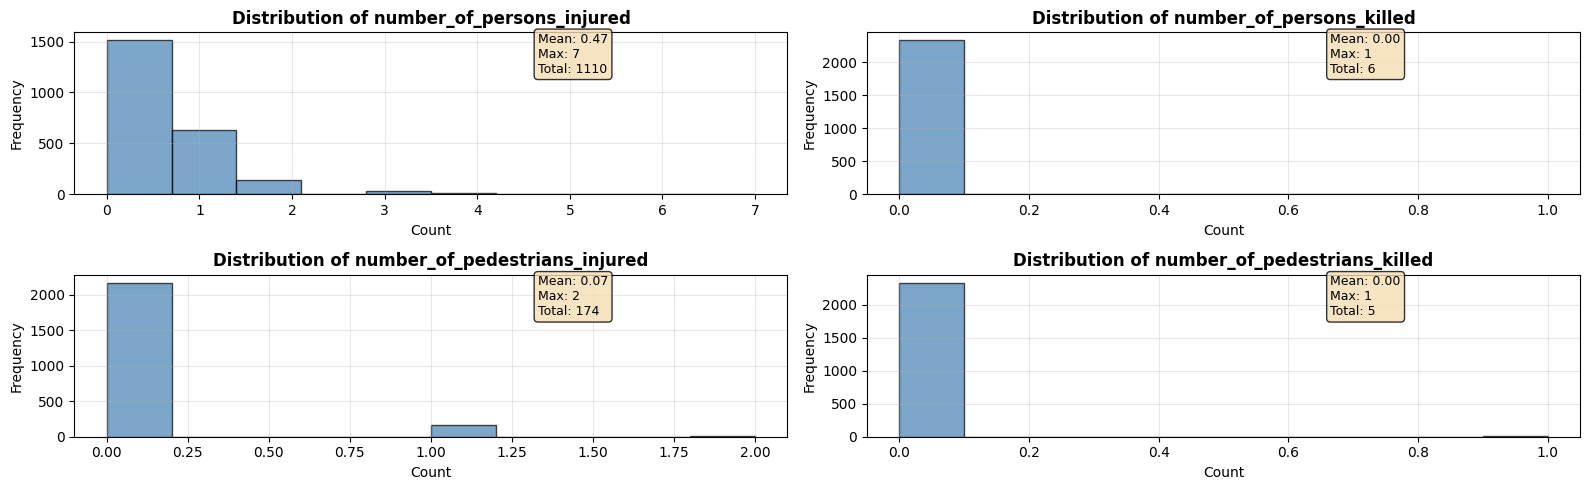

In [55]:
import matplotlib.pyplot as plt

# Define the numeric columns
numeric_cols = [
    'number_of_persons_injured', 'number_of_persons_killed',
    'number_of_pedestrians_injured', 'number_of_pedestrians_killed'
]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 5))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    data = borough_df[col].dropna()

    # Let matplotlib choose bins automatically
    axes[i].hist(data, alpha=0.7, color='steelblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontweight='bold', fontsize=12)
    axes[i].set_xlabel('Count', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(alpha=0.3)

    # Add statistics
    stats_text = f"Mean: {data.mean():.2f}\nMax: {data.max()}\nTotal: {data.sum()}"
    axes[i].text(0.65, 0.75, stats_text, transform=axes[i].transAxes,
                bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8),
                fontsize=9)

plt.tight_layout()
plt.show()

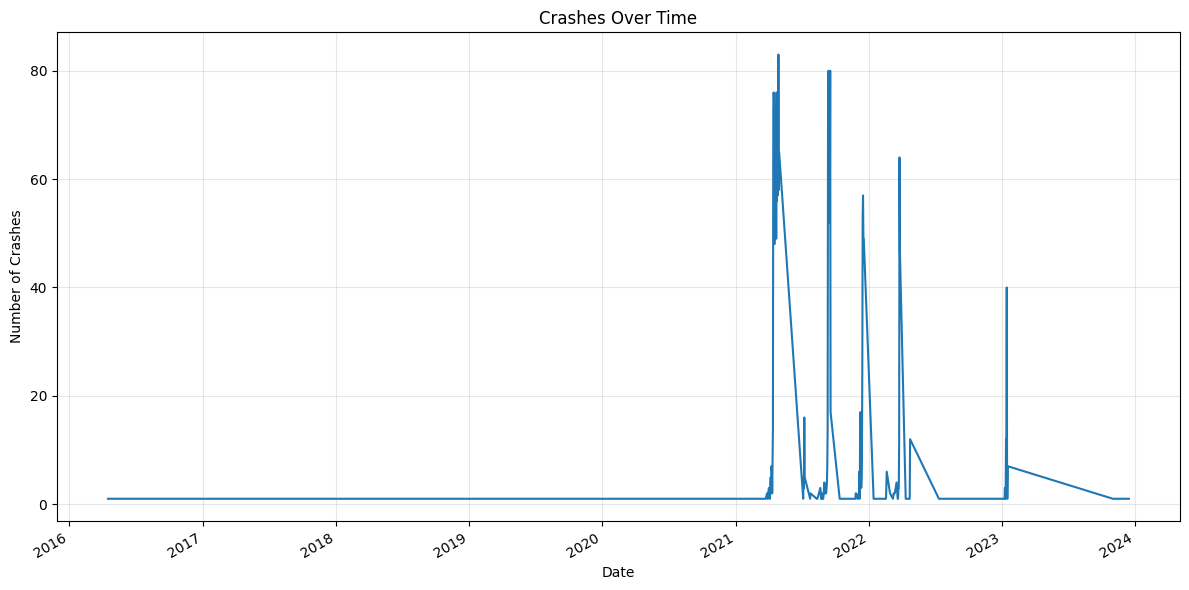

In [79]:
# First convert to datetime if needed, then plot
borough_df['crash_date'] = pd.to_datetime(borough_df['crash_date'])

# Plot crashes by date
borough_df['crash_date'].value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title('Crashes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


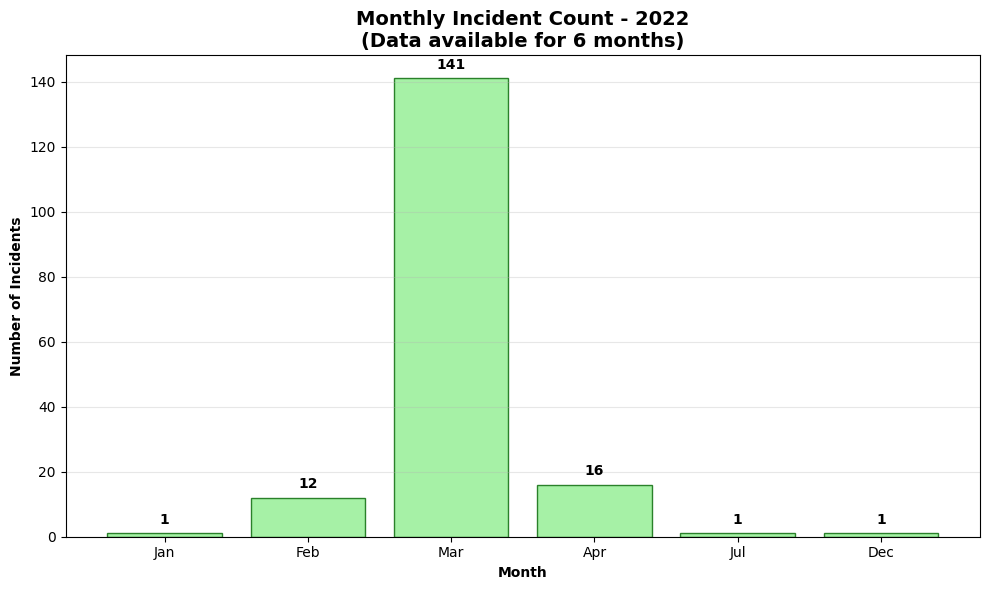

In [94]:

df_2022 = borough_df[borough_df['year'] == 2022]
monthly_2022 = df_2022['month'].value_counts().sort_index()

# Get month names for available months only
months_available = [['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][i-1] for i in monthly_2022.index]

plt.figure(figsize=(10, 6))
plt.bar(months_available, monthly_2022.values, color='lightgreen', edgecolor='darkgreen', alpha=0.8)
plt.title(f'Monthly Incident Count - 2022\n(Data available for {len(monthly_2022)} months)', fontweight='bold', fontsize=14)
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Number of Incidents', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, count in enumerate(monthly_2022.values):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

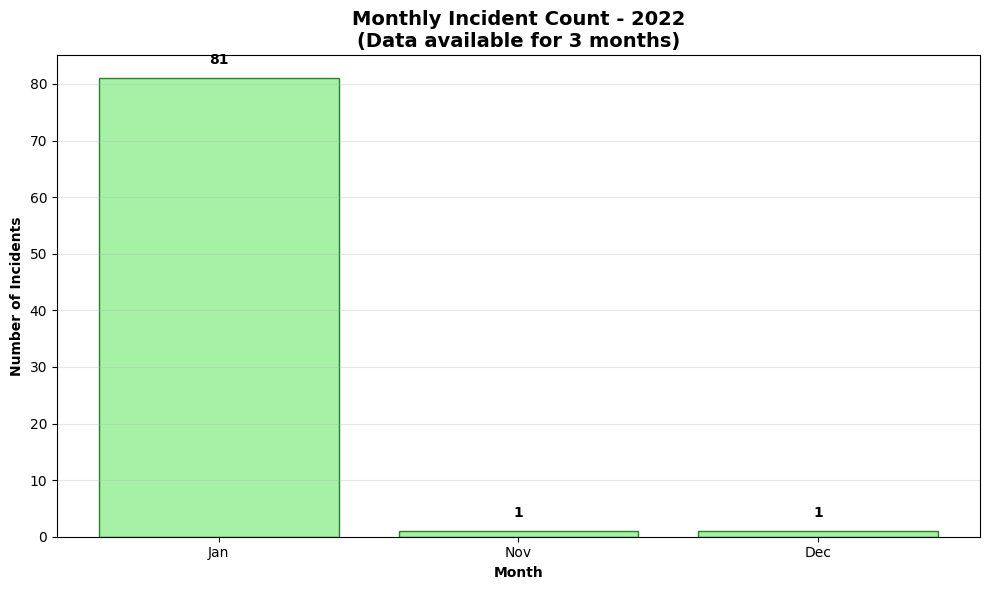

In [95]:
df_2023 = borough_df[borough_df['year'] == 2023]
monthly_2023 = df_2023['month'].value_counts().sort_index()

# Get month names for available months only
months_available = [['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][i-1] for i in monthly_2023.index]

plt.figure(figsize=(10, 6))
plt.bar(months_available, monthly_2023.values, color='lightgreen', edgecolor='darkgreen', alpha=0.8)
plt.title(f'Monthly Incident Count - 2022\n(Data available for {len(monthly_2023)} months)', fontweight='bold', fontsize=14)
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Number of Incidents', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, count in enumerate(monthly_2023.values):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
#We don't have data for all months. But here is our findinds from 6 months data in 2021 ans 3 months data in 2022
#Year 2021: March demonstrated the highest accident frequency, representing the peak risk period
#Year 2022: January exhibited maximum accident occurrence, indicating a shift in seasonal risk patterns


Text(0, 0.5, 'Number of Crashes')

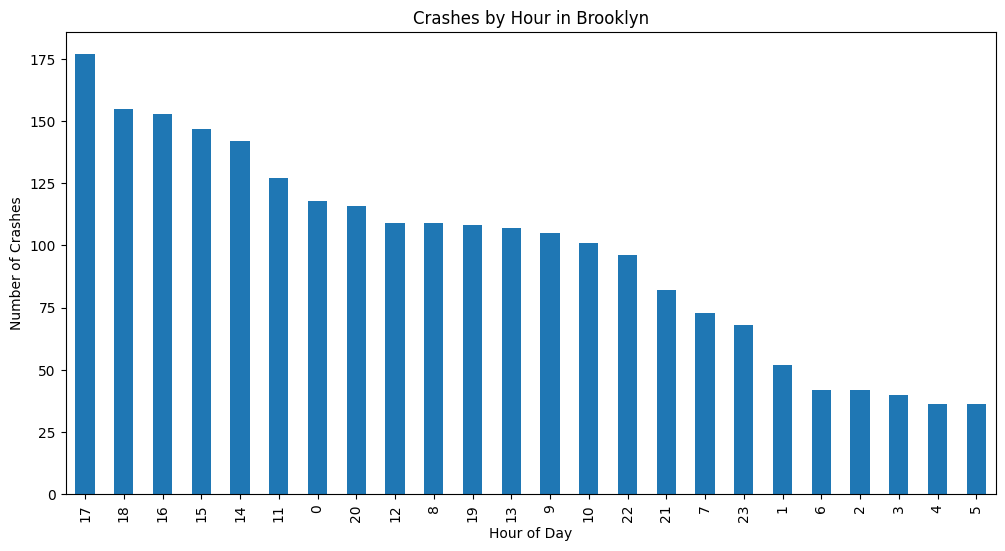

In [86]:
borough_df['crash_time'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title(f'Crashes by Hour in {your_borough}')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')

In [ ]:
''' High-Incident Cluster (Evening Commute):

17:00: Peak accident hour
18:00 & 16:00: Supporting peak periods
Collective Impact: 3-hour window accounts for disproportionate accident share

Low-Incident Period (Early Morning):

01:00-06:00: Minimal accident occurrence
Safety Correlation: Aligns with reduced traffic density